# Review Ratings Challenge

**Task:** Import review_ratings_headers.txt file

In [8]:
import pandas as pd

In [9]:
cd /Users/sagarsahoo/Downloads/QuantChallenge

/Users/sagarsahoo/Downloads/QuantChallenge


In [10]:
header_df = pd.read_csv('review_ratings_headers.txt',sep=":",names=['col1','col2'])

**Task:**
1. Extract "user" and "id" from the first line and combine with an underscore.
1. In each line after the first line, extract the word(s) after "on" in each line, removing special characters (e.g. /n, &, etc.). 
1. If there is more than one word, combine the words with a single underscore. 
1. Put the words into a list to use as headers for your dataset later.

Question 1: How many headers are there with 2 or more words combined by an underscore?

In [11]:
header_df['col2'][0] = header_df['col2'][0].replace('Unique ','')
header_df['col2'][0] = header_df['col2'][0].strip().replace(' ','_')
header_list= list(header_df['col2'][1:].str.split("on",n=1,expand=True)[1].str.strip().str.replace(' & ',' ').str.replace('/',' ').str.replace(' ','_'))
header_list[0]='user_id'


word_count=0
for x in header_list:
    is_extists = '_' in x
    if is_extists==True:
        word_count+=1
print('How many headers are there with 2 or more words combined by an underscore? Ans : ', word_count)

How many headers are there with 2 or more words combined by an underscore? Ans :  11


Question 2: How many underscores are there in all of the headers?

In [12]:
count = 0
for x in header_list:
    count+=x.count('_')
print('Question 2: How many underscores are there in all of the headers? A : ', count)

Question 2: How many underscores are there in all of the headers? A :  13


**Task:** Read in review_ratings.csv, set names as the cleaned headers list from above, skip the first row, and do not include an index column

In [13]:
review_rating_df = pd.read_csv('review_ratings.csv',sep=',',skiprows=1,names=header_list,index_col=False)
#review_ratings_df = review_rating_df_temp.iloc[1:]
review_rating_df.reset_index()
print(header_list)
#review_rating_df_temp.coulumns=header_list
review_rating_df.head(5)


['user_id', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']


,user_id,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 3343,1.49,2.75,2.88,2.91,5.00,5.00,1.56,1.53,1.52,...,0.78,0.77,0.78,0.80,1.16,0.76,0.74,0.73,0.74,0.77
1,User 5248,0.86,0.89,1.66,1.63,1.63,1.63,5.00,1.67,2.43,...,5.00,5.0,0.66,0.65,0.64,0.74,0.68,0.86,0.85,0.84
2,User 3364,0.73,0.76,0.80,2.06,2.92,5.00,5.00,1.62,5.00,...,1.83,1.83,0.75,0.74,0.74,0.77,1.08,0.73,0.72,0.71
3,User 2874,0.58,5.00,1.33,1.32,1.34,1.36,5.00,5.00,5.00,...,0.98,0.79,0.78,0.80,0.81,1.02,0.57,0.52,0.51,0.54
4,User 5055,1.80,1.74,1.75,5.00,5.00,1.69,1.67,1.66,1.67,...,1.09,1.1,1.13,1.15,1.37,0.63,0.62,0.63,5.00,0.69


Question 3: How many rows are in the ratings dataset?

In [14]:
print ('Question 3: How many rows are in the ratings dataset? A : ', review_rating_df.shape[0])

Question 3: How many rows are in the ratings dataset? A :  4624


**Task:** Import review_ratings_with_headers.csv

In [15]:
review_rating_df.shape

(4624, 24)

**Task:** Explore data types in the dataset

In [16]:
review_rating_df.dtypes

user_id                   object
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs               object
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

Question 4: What data type is local_services?

In [17]:
review_rating_df.dtypes['local_services']

dtype('float64')

In [18]:
review_rating_df[review_rating_df['dance_clubs'].str.contains('[A-Za-z]')]

,user_id,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
4123,User 1787,3.61,5.0,5.0,2.65,2.12,2.53,1.92,1.39,1.41,...,0.87,qh,0.76,0.77,0.79,0.84,5.0,0.75,0.74,0.75


**Task:** Find special characters that are in one of the columns, replace with 0, and convert to continuous/float type

Question 5: What was the string that contained the special characters?

In [19]:
review_rating_df['dance_clubs'] = review_rating_df['dance_clubs'].replace('qh', '0')
review_rating_df['dance_clubs'] = review_rating_df['dance_clubs'].astype('float') 

Question 6: What is the mean of the variable now that it has been converted to type continuous/float?

In [20]:
import numpy as np
round(np.mean(review_rating_df['dance_clubs']),1)

2.2

**Task:** Fill missing values with 0 and run summary statistics on the dataset

In [21]:
review_rating_df[review_rating_df.isnull().any(axis=1)].count()

user_id                  0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       0
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  0
dtype: int64

Question 7: What is the IQR of ratings for resorts?

In [22]:
import numpy as np
iqr = np.subtract(*np.percentile(review_rating_df['resorts'], [75, 25]))
print(round(iqr,2))

0.89


**Task:** Import review_ratings_processed.csv

In [23]:
review_ratings_processed_df = pd.read_csv('review_ratings_processed.csv')
print(review_ratings_processed_df.shape)
print(review_ratings_processed_df.dtypes)
review_ratings_processed_df.head(5)

(4624, 25)
user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object


,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 3343,1.49,2.75,2.88,2.91,5.00,5.00,1.56,1.53,1.52,...,0.77,0.78,0.80,1.16,0.76,0.74,0.73,0.74,0.77,0.80
1,User 5248,0.86,0.89,1.66,1.63,1.63,1.63,5.00,1.67,2.43,...,5.00,0.66,0.65,0.64,0.74,0.68,0.86,0.85,0.84,0.84
2,User 3364,0.73,0.76,0.80,2.06,2.92,5.00,5.00,1.62,5.00,...,1.83,0.75,0.74,0.74,0.77,1.08,0.73,0.72,0.71,0.71
3,User 2874,0.58,5.00,1.33,1.32,1.34,1.36,5.00,5.00,5.00,...,0.79,0.78,0.80,0.81,1.02,0.57,0.52,0.51,0.54,0.56
4,User 5055,1.80,1.74,1.75,5.00,5.00,1.69,1.67,1.66,1.67,...,1.10,1.13,1.15,1.37,0.63,0.62,0.63,5.00,0.69,1.71


**Task:** Find the variables that are most correlated with each other

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
cor = review_ratings_processed_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<Figure size 2000x1000 with 2 Axes>

Question 8: Which variables are included in the **top 10** **most** correlated (based on absolute value)? 

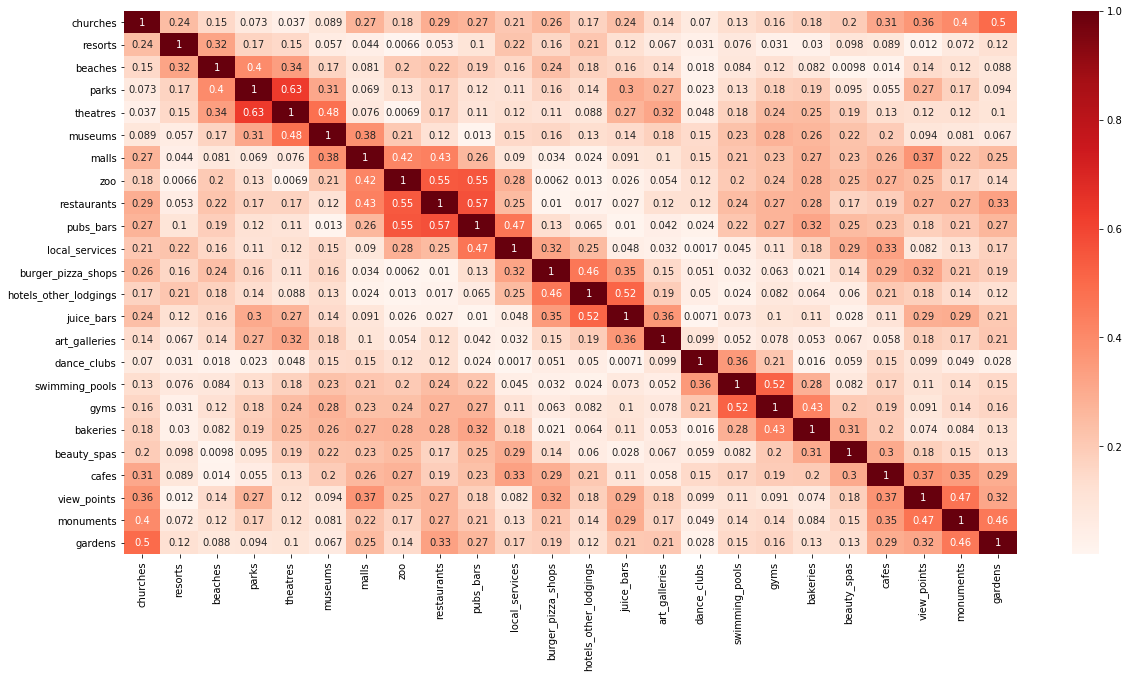

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
cor = review_ratings_processed_df.corr()
cor_abs= abs(cor)
sns.heatmap(cor_abs, annot=True, cmap=plt.cm.Reds)
plt.show()

**Task:** Group each variable into 10 equal-width bins and calculate the **mean malls** rating for each bin

In [26]:
#review_ratings_processed_df['malls_bin']
#review_ratings_processed_df.drop('malls_bin', axis=1, inplace=True)
review_ratings_processed_df.head(5)

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 3343,1.49,2.75,2.88,2.91,5.00,5.00,1.56,1.53,1.52,...,0.77,0.78,0.80,1.16,0.76,0.74,0.73,0.74,0.77,0.80
1,User 5248,0.86,0.89,1.66,1.63,1.63,1.63,5.00,1.67,2.43,...,5.00,0.66,0.65,0.64,0.74,0.68,0.86,0.85,0.84,0.84
2,User 3364,0.73,0.76,0.80,2.06,2.92,5.00,5.00,1.62,5.00,...,1.83,0.75,0.74,0.74,0.77,1.08,0.73,0.72,0.71,0.71
3,User 2874,0.58,5.00,1.33,1.32,1.34,1.36,5.00,5.00,5.00,...,0.79,0.78,0.80,0.81,1.02,0.57,0.52,0.51,0.54,0.56
4,User 5055,1.80,1.74,1.75,5.00,5.00,1.69,1.67,1.66,1.67,...,1.10,1.13,1.15,1.37,0.63,0.62,0.63,5.00,0.69,1.71


Question 9: Which chart below matches mean **mall** rating by **juice_bar** bins?

In [27]:
review_ratings_processed_df.columns

Index(['user_id', 'churches', 'resorts', 'beaches', 'parks', 'theatres',
       'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens'],
      dtype='object')

**Task:** Split dataset into features that include all variables except **juice_bars** and user_id

In [28]:
features_df = review_ratings_processed_df[['churches', 'resorts', 'beaches', 'parks', 'theatres',
       'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']]

output_df = review_ratings_processed_df['juice_bars']

In [29]:
print(features_df.shape)
features_df.head(5)

(4624, 23)


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,1.49,2.75,2.88,2.91,5.00,5.00,1.56,1.53,1.52,1.53,...,0.77,0.78,0.80,1.16,0.76,0.74,0.73,0.74,0.77,0.80
1,0.86,0.89,1.66,1.63,1.63,1.63,5.00,1.67,2.43,2.99,...,5.00,0.66,0.65,0.64,0.74,0.68,0.86,0.85,0.84,0.84
2,0.73,0.76,0.80,2.06,2.92,5.00,5.00,1.62,5.00,1.56,...,1.83,0.75,0.74,0.74,0.77,1.08,0.73,0.72,0.71,0.71
3,0.58,5.00,1.33,1.32,1.34,1.36,5.00,5.00,5.00,2.88,...,0.79,0.78,0.80,0.81,1.02,0.57,0.52,0.51,0.54,0.56
4,1.80,1.74,1.75,5.00,5.00,1.69,1.67,1.66,1.67,2.06,...,1.10,1.13,1.15,1.37,0.63,0.62,0.63,5.00,0.69,1.71


In [30]:
review_ratings_processed_df.shape

(4624, 25)

**Task:** Set your seed to 42 and split the data into **80%** training and **20%** test sets 

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(features_df,output_df,
                                                  test_size =0.2,random_state=42)

In [32]:
y_test.shape

(925,)

In [33]:
x_test.shape

(925, 23)

**Task:** Set seed to 42 and fit a Random Forest with **10 trees/estimators** to the training set

In [34]:
from sklearn.ensemble import RandomForestRegressor
rgr = RandomForestRegressor(n_jobs= 2, random_state=42 , n_estimators= 100)
rgr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [35]:
preds = rgr.predict(x_test)

Question 10: What R-Squared value did the model achieve on the test set?

In [36]:
from sklearn.metrics import r2_score
r2_test_score = r2_score(y_test, preds)
print(r2_test_score)

0.7589995189062402


**Task:** Predict **juice_bars** ratings for the full dataset (training and test combined) and append predictions to the table

In [37]:
full_preds = rgr.predict(features_df)

In [38]:
review_ratings_processed_df['pred_juice_bars_full'] = full_preds

**Task:** Compute the squared residual for each user id, append to table and sort descending by squared residual 

In [39]:
review_ratings_processed_df['rss_calculated'] = (review_ratings_processed_df['juice_bars']
                                                 -review_ratings_processed_df['pred_juice_bars_full'])**2

review_ratings_processed_df_sorted = review_ratings_processed_df.sort_values('rss_calculated',ascending=False)

Question 11: Which IDs are included in the **top 10** losses as measured by squared residual

In [40]:
top_10_rss_ids = list(review_ratings_processed_df_sorted['user_id'][:10])
print(top_10_rss_ids)

['User 1578', 'User 634', 'User 4288', 'User 2122', 'User 629', 'User 5356', 'User 5206', 'User 5418', 'User 2733', 'User 120']


**Task:** Extract the first tree/estimator from the Random Forest Model

In [41]:
print(rgr.feature_importances_)

[0.03384531 0.01661713 0.02172043 0.0165437  0.07081658 0.02944285
 0.01008633 0.02463069 0.01261968 0.02618302 0.01649145 0.04410008
 0.36225724 0.10830784 0.02998825 0.01212095 0.03974426 0.031598
 0.01962253 0.0318601  0.00747388 0.0214124  0.0125173 ]


In [50]:
print(rgr.estimators_[0])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1608637542, splitter='best')


In [52]:
features_df.shape

(4624, 23)

**Task:** Create a sparse matrix with Location (e.g. resorts, beauty_spas, swimming_pools, etc.) on the rows and UserID on the columns with ratings as the values (fill any missing ratings for users with 0)

In [44]:
sp_martix_tmp = review_ratings_processed_df.copy()

sp_martix_tmp = sp_martix_tmp.transpose()

header = sp_martix_tmp.iloc[0]
sp_martix = sp_martix_tmp[1:]

sp_martix = sp_martix.rename(columns = header)
sp_martix.drop(sp_martix.tail(2).index,inplace=True)

In [45]:
#review_ratings_processed_df
#sp_martix_tmp = review_ratings_processed_df.copy()
#sp_martix_tmp = sp_martix_tmp.transpose()
#header = sp_martix_tmp.iloc[0]
#sp_martix = sp_martix_tmp[1:]
#sp_martix.rename(columns = header)
#sp_martix= sp_martix.rename(columns = header)
type(sp_martix)

pandas.core.frame.DataFrame

**Task:** Apply a brute-force K-Nearest Neighbors algorithm to the matrix with a cosine metric 

In [46]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(5, metric='cosine',algorithm='brute')
neigh.fit(sp_martix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

Question 13: Which categories are included in the top 5 nearest neighbors to **swimming_pools**?